In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import streamlit as st

**Collecting Data**

In [2]:
start = '2012-01-01'
end = '2023-11-20'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace = True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2985,2023-11-13,133.360001,134.110001,132.770004,133.639999,133.639999,16409900
2986,2023-11-14,135.649994,137.240005,135.100006,135.429993,135.429993,22317300
2987,2023-11-15,136.639999,136.839996,135.330002,136.380005,136.380005,15840900
2988,2023-11-16,136.960007,138.880005,136.080002,138.699997,138.699997,17615100


In [9]:
#moving average
ma_100_days = data.Close.rolling(100).mean()

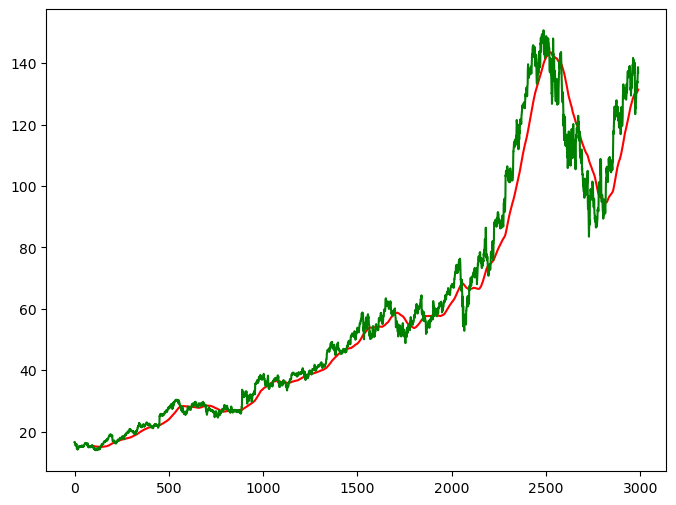

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

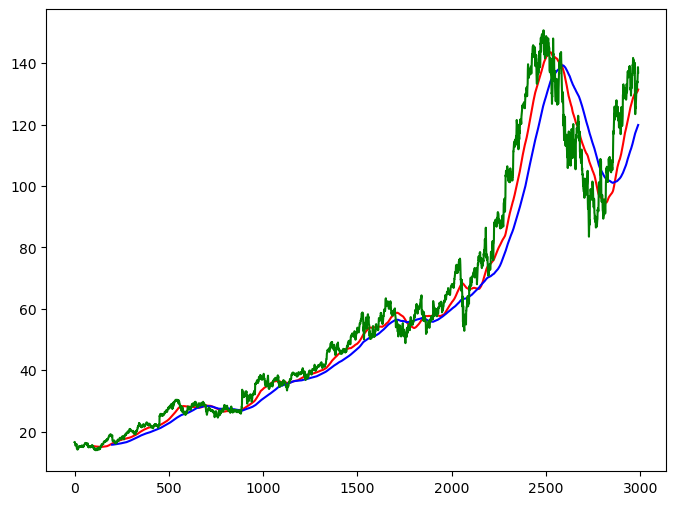

In [12]:
plt.figure(figsize = (8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.dropna(inplace = True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0], data_test.shape[0]

(2392, 598)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [61]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
72/72 [==============================] - 18s 184ms/step - loss: 0.0227
Epoch 2/50
72/72 [==============================] - 14s 194ms/step - loss: 0.0047
Epoch 3/50
72/72 [==============================] - 13s 187ms/step - loss: 0.0041
Epoch 4/50
72/72 [==============================] - 13s 185ms/step - loss: 0.0033
Epoch 5/50
72/72 [==============================] - 13s 177ms/step - loss: 0.0037
Epoch 6/50
72/72 [==============================] - 13s 179ms/step - loss: 0.0035
Epoch 7/50
72/72 [==============================] - 13s 178ms/step - loss: 0.0030
Epoch 8/50
72/72 [==============================] - 13s 179ms/step - loss: 0.0030
Epoch 9/50
72/72 [==============================] - 13s 180ms/step - loss: 0.0024
Epoch 10/50
72/72 [==============================] - 13s 179ms/step - loss: 0.0025
Epoch 11/50
72/72 [==============================] - 13s 179ms/step - loss: 0.0027
Epoch 12/50
72/72 [==============================] - 13s 180ms/step - loss: 0.0022
Epoch 13/50
7

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [73]:
pas_100_days = data_train.tail(100)

In [74]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [75]:
data_test_scale = scaler.fit_transform(data_test)

In [76]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [77]:
y_predict = model.predict(x)

25/25 [==============================] - 2s 69ms/step


In [78]:
scale = 1/scaler.scale_

In [79]:
y_predict = y_predict * scale

In [80]:
y = y * scale

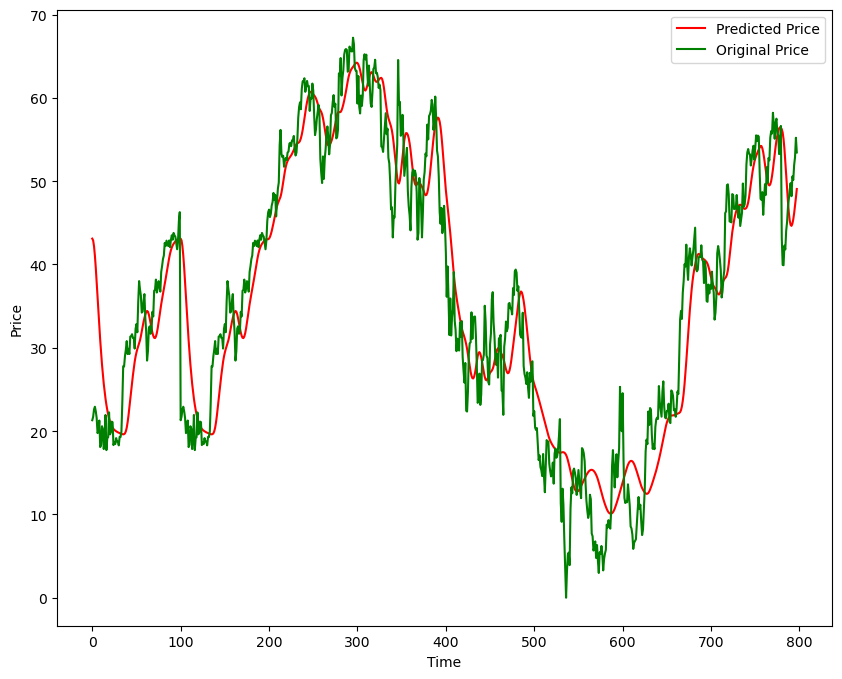

In [83]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [84]:
model.save('StockPredictionsModel.keras')